In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Loading the data:

In [2]:
df_hep = pd.read_csv('E:\datasets\hepC\HepatitisCdata.csv')
df_hep.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Data preprocessing:

In [3]:
df_hep.drop('Unnamed: 0', axis=1, inplace=True)
df_hep.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
print(df_hep['Category'].unique())
print(df_hep['Sex'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
['m' 'f']


We have two categorical columns: Category (our target variable), and Sex. Let us encode them. 

In [5]:
features = ['Category', 'Sex']

for feature in features:
    df_hep[feature] = LabelEncoder().fit_transform(df_hep[feature])

In [6]:
df_hep['Category'].unique()

array([0, 1, 2, 3, 4])

In [7]:
df_hep['Sex'].unique()

array([1, 0])

In [8]:
df_hep.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,0.386992,47.408130,0.613008,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,1.052294,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,4.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


There seem to be missing values in ALB, ALP, ALT, CHOL and PROT. Let us fill this values.

In [9]:
features = ['ALB', 'ALP', 'ALT','CHOL','PROT']

for feature in features:
    df_hep[feature].fillna(df_hep[feature].median(), inplace=True)
    
df_hep.describe()    

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.386992,47.408130,0.613008,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,1.052294,10.055105,0.487458,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,4.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64


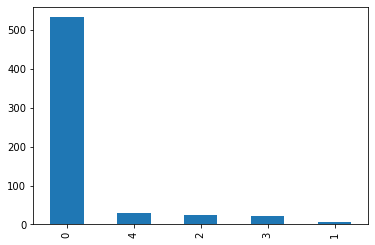

In [10]:
df_hep['Category'].value_counts().plot.bar()
print(df_hep['Category'].value_counts())    

Here we see that the classes are heavily imbalanced. We need to perform over/under sampling. Let us train a model over the data set as is, to see a change after we perform the sampling.

# Training:

In [11]:
X = df_hep.drop('Category', axis = 1)
y = df_hep['Category']

print(X)
print(y)

     Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0     32    1  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1     32    1  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2     32    1  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3     32    1  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4     32    1  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
610   62    0  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611   64    0  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612   64    0  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
613   46    0  33.0   66.2   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
614   59    0  36.0   66.2  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT  
0    69.0  
1    76.5  
2    79.3  
3    75.7  
4    68.7  
.. 

The data isn't standardized. Let us use the Standard Scaler on it.

In [12]:
X = StandardScaler().fit_transform(X)
X

array([[-1.53361617,  0.79454373, -0.54073873, ...,  0.49707027,
        -0.50228619, -0.56441905],
       [-1.53361617,  0.79454373, -0.54073873, ..., -0.14658961,
        -0.43820313,  0.82605409],
       [-1.53361617,  0.79454373,  0.91475496, ...,  0.09478284,
        -0.11595686,  1.34516406],
       ...,
       [ 1.65143725, -1.25858397, -2.18683279, ..., -0.29342452,
         0.45163601,  1.84573439],
       [-0.1401553 , -1.25858397, -1.49374055, ..., -0.58910578,
         0.19164186, -0.19362621],
       [ 1.15377266, -1.25858397, -0.97392137, ..., -0.28739021,
        -0.1013093 , -0.74981546]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
dt = DecisionTreeClassifier()
history = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
history.score(X_test, y_test)

0.8866995073891626

We have a score of 85.22%. However, let us see if this score actually works over the imbalanced class.

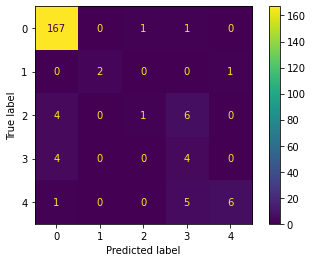

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

As expected, the model has trained only over class 0, and is overfitting the same. Let us oversample the data using SMOTE

In [16]:
sm = SMOTE(sampling_strategy='not majority', k_neighbors=2)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [17]:
print(X_train.shape, y_train.shape)
print(X_sm.shape, y_sm.shape)

(412, 12) (412,)
(1820, 12) (1820,)


Here we see that there is an increase in the number of entries in X_train and y_train. Let us use these to train our model again.

In [18]:
dt_sm = DecisionTreeClassifier()
history_sm = dt_sm.fit(X_sm, y_sm)
y_pred_sm = dt_sm.predict(X_test)
history_sm.score(X_test, y_test)

0.8275862068965517

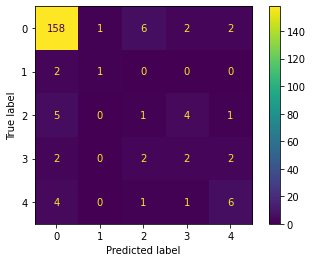

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_sm)).plot()

It offers a slight improvement, now lets try undersampling.

In [20]:
ru = RandomUnderSampler(sampling_strategy='majority')

X_ru, y_ru = ru.fit_resample(X_sm, y_sm)

In [21]:
dt_ru = DecisionTreeClassifier()
history_ru = dt_ru.fit(X_ru, y_ru)
y_pred_ru = dt_ru.predict(X_test)
history_ru.score(X_test, y_test)

0.8226600985221675

We aren't getting any benefits from undersampling, so we shall stick with only over sampling the data. Now let us try using class weights to provide some bias to the minority classes.

In [22]:
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [23]:
cw = dict(zip(np.unique(y_train),cw))
cw

{0: 0.22637362637362637,
 1: 20.6,
 2: 6.338461538461538,
 3: 6.338461538461538,
 4: 4.5777777777777775}

In [24]:
dt_sm = DecisionTreeClassifier(class_weight=cw)
history_sm = dt_sm.fit(X_sm, y_sm)
y_pred_sm = dt_sm.predict(X_test)
history_sm.score(X_test, y_test)

0.8669950738916257

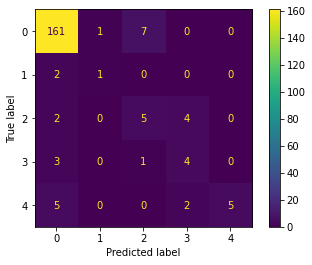

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_sm)).plot()

There isn't too much of an improvement. Let us now try with models other than Decision Tree.

## Random Forest:

In [26]:
rf = RandomForestClassifier()
history_rf = rf.fit(X_sm, y_sm)
y_pred_rf = rf.predict(X_test)
history_rf.score(X_test, y_test)

0.896551724137931

## XGBoost:

In [27]:
xgb = XGBClassifier()
history_xgb = xgb.fit(X_sm, y_sm)
y_pred_xgb = xgb.predict(X_test)
history_xgb.score(X_test, y_test)

[22:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8916256157635468

We have the highest accuracy with XGBoost having a score of 89.16%. Let us perform hyper parameter tuning for it. 

# Hyperparameter Tuning:

With each round of tuning, the general values of the parameters are fed to an instance of RandomizedSearchCV. After each round of tuning, the best parameters will be adjusted in the parameter grid. Finally, we shall use an instance of GridSearchCV to find the best fitted variant of XGBoost.

In [28]:
eta = [0.001, 0.01, 0.1, 0.2, 0.3]
gamma = [0, 0.001, 0.01, 0.1, 1]
min_child_weight = [1, 2, 3]
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
colsample_bytree = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_estimators = [100, 200, 500]

random_grid = {'eta':eta,
              'gamma':gamma,
              'min_child_weight':min_child_weight,
              'max_depth':max_depth,
              'subsample':subsample,
              'colsample_bytree':colsample_bytree,
              'n_estimators':n_estimators}

random_grid

{'eta': [0.001, 0.01, 0.1, 0.2, 0.3],
 'gamma': [0, 0.001, 0.01, 0.1, 1],
 'min_child_weight': [1, 2, 3],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'n_estimators': [100, 200, 500]}

In [29]:
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = random_grid, 
                                n_iter = 50, cv = 3, random_state=42, n_jobs = -1)

xgb_random.fit(X_sm, y_sm)

C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:35:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           scale_pos_weight=None, subsample=1,
                                           tree_method='ex

In [30]:
xgb_random.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 8,
 'gamma': 0,
 'eta': 0.01,
 'colsample_bytree': 0.5}

In [31]:
eta = [0.15, 0.2, 0.25]
gamma = [0]
min_child_weight = [2]
max_depth = [8]
subsample = [0.4, 0.45, 0.5, 0.55]
colsample_bytree = [0.55, 0.6, 0.65]
n_estimators = [50, 100]

random_grid2 = {'eta':eta,
              'gamma':gamma,
              'min_child_weight':min_child_weight,
              'max_depth':max_depth,
              'subsample':subsample,
              'colsample_bytree':colsample_bytree,
              'n_estimators':n_estimators}

random_grid2

{'eta': [0.15, 0.2, 0.25],
 'gamma': [0],
 'min_child_weight': [2],
 'max_depth': [8],
 'subsample': [0.4, 0.45, 0.5, 0.55],
 'colsample_bytree': [0.55, 0.6, 0.65],
 'n_estimators': [50, 100]}

In [32]:
xgb_random2 = RandomizedSearchCV(estimator=xgb, param_distributions = random_grid2, 
                                n_iter = 50, cv = 3, random_state=42, n_jobs = -1)

xgb_random2.fit(X_sm, y_sm)

C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_

In [33]:
xgb_random2.best_params_

{'subsample': 0.55,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 8,
 'gamma': 0,
 'eta': 0.25,
 'colsample_bytree': 0.6}

In [34]:
eta = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
gamma = [0]
min_child_weight = [2]
max_depth = [8]
subsample = [0.2, 0.3, 0.33, 0.36, 0.4]
colsample_bytree = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55]
n_estimators = [100, 150]

random_grid3 = {'eta':eta,
              'gamma':gamma,
              'min_child_weight':min_child_weight,
              'max_depth':max_depth,
              'subsample':subsample,
              'colsample_bytree':colsample_bytree,
              'n_estimators':n_estimators}

random_grid3

{'eta': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
 'gamma': [0],
 'min_child_weight': [2],
 'max_depth': [8],
 'subsample': [0.2, 0.3, 0.33, 0.36, 0.4],
 'colsample_bytree': [0.5, 0.51, 0.52, 0.53, 0.54, 0.55],
 'n_estimators': [100, 150]}

In [35]:
xgb_random3 = RandomizedSearchCV(estimator=xgb, param_distributions = random_grid3, 
                                n_iter = 50, cv = 3, random_state=42, n_jobs = -1)

xgb_random3.fit(X_sm, y_sm)

C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=None, s

In [36]:
xgb_random3.best_params_

{'subsample': 0.4,
 'n_estimators': 150,
 'min_child_weight': 2,
 'max_depth': 8,
 'gamma': 0,
 'eta': 0.13,
 'colsample_bytree': 0.55}

In [37]:
eta = [0.13]
gamma = [0]
min_child_weight = [2]
max_depth = [8]
subsample = [0, 0.11, 0.14, 0.17, 0.2, 0.23, 0.26]
colsample_bytree = [0.53]
n_estimators = [100]

random_grid4 = {'eta':eta,
              'gamma':gamma,
              'min_child_weight':min_child_weight,
              'max_depth':max_depth,
              'subsample':subsample,
              'colsample_bytree':colsample_bytree,
              'n_estimators':n_estimators}

random_grid4

{'eta': [0.13],
 'gamma': [0],
 'min_child_weight': [2],
 'max_depth': [8],
 'subsample': [0, 0.11, 0.14, 0.17, 0.2, 0.23, 0.26],
 'colsample_bytree': [0.53],
 'n_estimators': [100]}

In [38]:
xgb_random4 = RandomizedSearchCV(estimator=xgb, param_distributions = random_grid4, 
                                n_iter = 50, cv = 3, random_state=42, n_jobs = -1)

xgb_random4.fit(X_sm, y_sm)

C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=50. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[22:36:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_

In [39]:
xgb_random4.best_params_

{'subsample': 0.26,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 8,
 'gamma': 0,
 'eta': 0.13,
 'colsample_bytree': 0.53}

We have our best parameters from the Random Search as   
{'subsample': 0.2,  
 'n_estimators': 100,  
 'min_child_weight': 2,  
 'max_depth': 8,  
 'gamma': 0,  
 'eta': 0.13,  
 'colsample_bytree': 0.53}  
 Let us now perform a grid search on these parameters.

In [40]:
eta = [0.12, 0.13, 0.14]
gamma = [0]
min_child_weight = [2]
max_depth = [8]
subsample = [0.19, 0.2, 0.21]
colsample_bytree = [0.525, 0.53, 0.535]
n_estimators = [100]

grid_param = {'eta':eta,
              'gamma':gamma,
              'min_child_weight':min_child_weight,
              'max_depth':max_depth,
              'subsample':subsample,
              'colsample_bytree':colsample_bytree,
              'n_estimators':n_estimators}

grid_param

{'eta': [0.12, 0.13, 0.14],
 'gamma': [0],
 'min_child_weight': [2],
 'max_depth': [8],
 'subsample': [0.19, 0.2, 0.21],
 'colsample_bytree': [0.525, 0.53, 0.535],
 'n_estimators': [100]}

In [41]:
xgb_grid = GridSearchCV(estimator = xgb, param_grid = grid_param, 
                          cv = 3, n_jobs = -1)

history_xgb_grid = xgb_grid.fit(X_sm, y_sm)

[22:36:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\varun\anaconda3\envs\workEnv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [42]:
best_xgb_grid = xgb_grid.best_estimator_
xgb_grid.best_params_

{'colsample_bytree': 0.525,
 'eta': 0.12,
 'gamma': 0,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.21}

In [43]:
best_xgb_grid.score(X_test, y_test)

0.9113300492610837

After hyperparameter tuning, we improved the overall score from 89.16% to 91.13%. 